# FinRisk: Investment Risk Prediction Using Machine Learning


Importing neccesary libraries for the project

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Reading the data initially

In [32]:
stock_data = pd.read_csv('/content/GOOGL_data.csv', index_col = 'date', parse_dates = True)
stock_data.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL
2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL
2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL
2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL
2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL


Data Cleaning Procedure Begins. Eliminating the columns that won't be useful.

The stock data is of the company: GOOGLE INC.

In [33]:
stock_data = stock_data.drop(columns = 'Name')
stock_data.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,682.357041,687.362776,676.691790,682.233847,2.457501e+06
std,187.409986,188.531563,186.265742,187.573892,1.591432e+06
min,384.964600,390.164800,381.010700,383.340000,5.211410e+05
25%,543.660000,547.585000,539.200000,543.022500,1.456867e+06
50%,651.570000,658.255500,642.165000,652.470000,1.938260e+06
75%,805.960000,810.739500,801.565000,806.400000,3.031624e+06
max,1188.000000,1198.000000,1184.060000,1187.560000,2.314537e+07


Feature Engineering: We will be adding 3 new features: a) 20 Days Moving Average. b) 50 days Moving Average and c) Volatility.

In [34]:
stock_data['Return'] = stock_data['close'].pct_change()
stock_data['MA20'] = stock_data['close'].rolling(window = 20).mean()
stock_data['MA50'] = stock_data['close'].rolling(window = 50).mean()
stock_data['Volatility'] = stock_data['Return'].rolling(window= 20).std()

stock_data = stock_data.dropna()

Now that the new features are installed, let's have a look at them

In [35]:
stock_data.head()

,open,high,low,close,volume,Return,MA20,MA50,Volatility
date,,,,,,,,,
2013-04-22,400.7003,402.3810,387.8875,400.4571,5760454,0.000305,397.005055,401.336860,0.015140
2013-04-23,400.9005,408.1578,400.5802,404.3539,4579994,0.009731,396.961510,401.562384,0.015312
2013-04-24,404.4591,409.4090,404.4040,407.1337,3654448,0.006875,396.987385,401.873034,0.015372
2013-04-25,408.5331,408.6432,404.2188,404.9545,3980422,-0.005353,397.148545,402.157318,0.015164
2013-04-26,404.2038,404.2739,398.6883,401.1107,4970304,-0.009492,397.329525,402.343104,0.015125


Let us look at some useful data to understand the variables

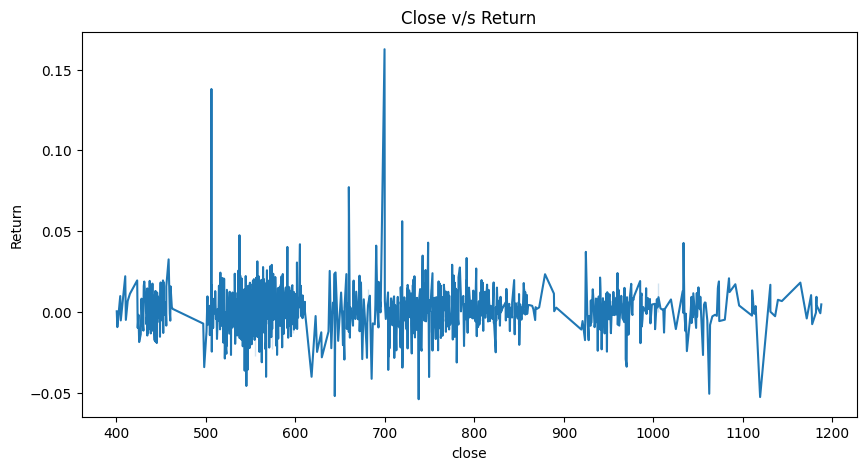

In [53]:
plt.figure(figsize = (10,5))
plt.title("Close v/s Return")
sns.lineplot(x = stock_data.close, y = stock_data.Return)
plt.show()

Understading the growth of the Stock in the market with time by looking the average of HIGH and LOW Value of the stock for each day

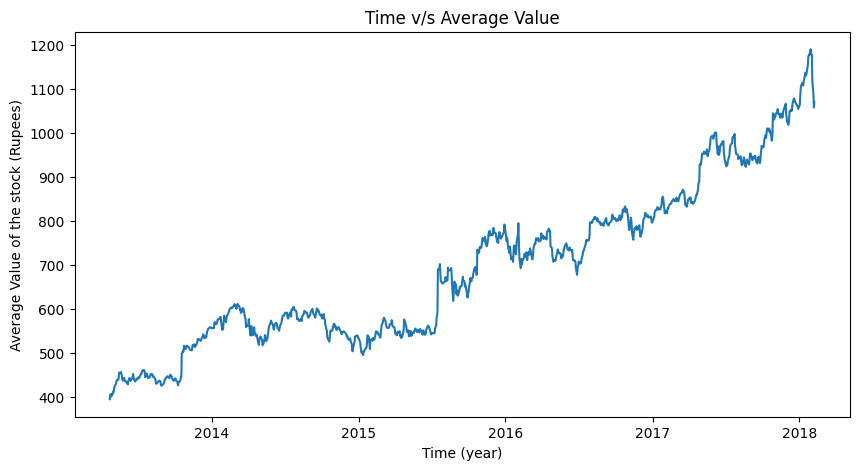

In [56]:
stock_data['Average'] = stock_data[['high', 'low']].mean(axis = 1)

plt.figure(figsize = (10,5))
plt.title("Time v/s Average Value")
plt.xlabel("Time (year)")
plt.ylabel("Average Value of the stock (Rupees)")
sns.lineplot(x = stock_data.index, y = stock_data.Average)
plt.show()

It can be clearly seen that the average value of the stock rises with time that displays it growth and potential in the company to reach new heights.

Further, let us understand the returns that the stakeholders achieved in these 5 years.

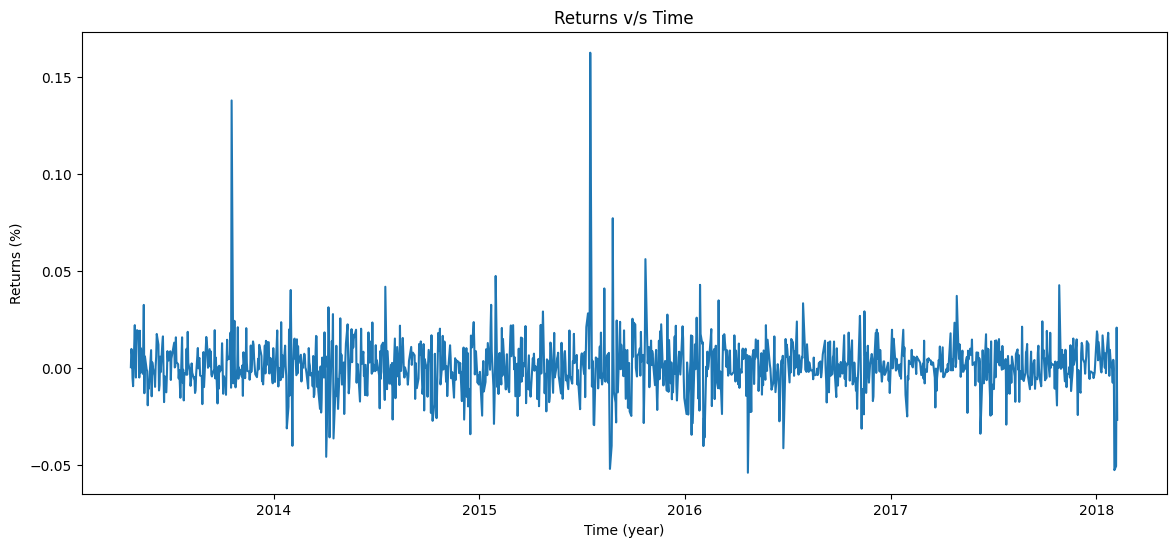

In [51]:
plt.figure(figsize = (14,6))
plt.title("Returns v/s Time")
plt.xlabel("Time (year)")
plt.ylabel("Returns (%)")
sns.lineplot(x = stock_data.index, y = stock_data.Return)
plt.show()

Majority of the Returns spiked up in the FY 2015-2016. If compared with the Average value of the stock v/s time graph, the spike in the mentioned year happened because of the rise in the stock value as observed in the previous graph

Working in the risks now


In [74]:
stock_data['Risk'] = np.where(stock_data['Return'] < -0.015, 1, 0)
stock_data.describe()

,open,high,low,close,volume,Return,MA20,MA50,Volatility,Average,Risk
count,1210.000000,1210.000000,1210.000000,1210.000000,1.210000e+03,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000
mean,693.737273,698.832951,687.961918,693.608287,2.370873e+06,0.000897,687.771989,679.098088,0.012643,693.397434,0.085124
std,182.242715,183.299398,181.194708,182.427978,1.529450e+06,0.013957,179.174255,174.633220,0.005873,182.222882,0.279181
min,400.700300,402.381000,387.887500,400.457100,5.211410e+05,-0.054141,396.961510,401.336860,0.003495,395.134250,0.000000
25%,548.000000,552.557500,544.450025,548.150000,1.441388e+06,-0.005593,549.813500,549.535685,0.009009,548.047500,0.000000
50%,669.270000,674.417500,660.620000,670.075000,1.881577e+06,0.000679,658.473250,647.214700,0.011109,666.832500,0.000000
75%,808.512500,813.490000,804.097500,809.210000,2.831568e+06,0.007728,803.144500,800.552250,0.014693,808.632500,0.000000
max,1188.000000,1198.000000,1184.060000,1187.560000,2.314537e+07,0.162584,1148.379000,1094.372200,0.039967,1191.030000,1.000000


A new column 'Risk' is created here, the thresholds are set such that, if the return is < -2%, we say that it is risky. Well, does that mean our 'Risk' variable depends only and only on 'Returns' and not on other features? Definately not! Since the column of risk was not initially present in the dataset, and that the risk majorly depends on the return stats, we set our target variable ('Risk') on the basis of 'Returns'. Futher, the model we build involves our other features that will help in prediciting the risk when some new input is given.

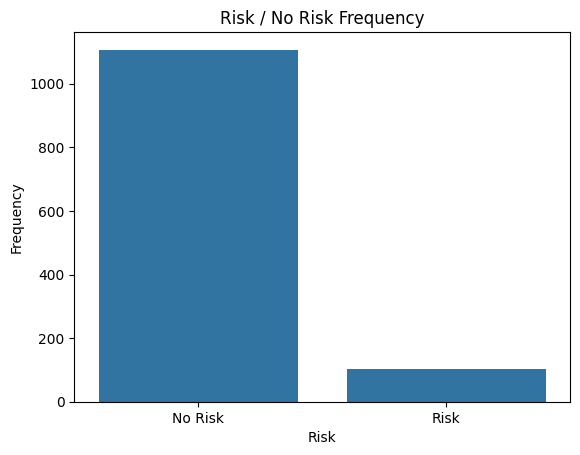

In [75]:
sns.countplot(x = stock_data.Risk)
plt.ylabel("Frequency")
plt.title("Risk / No Risk Frequency")
plt.xticks(ticks = [0,1] , labels = ["No Risk", "Risk"])
plt.show()

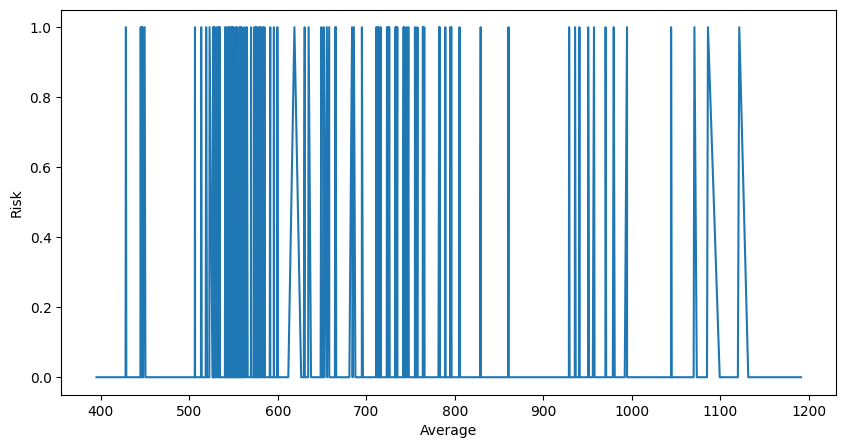

In [84]:
plt.figure(figsize = (10,5))
sns.lineplot(x = stock_data.Average, y = stock_data.Risk)
plt.show()

We observe that there is a high risk when the average value of the stock was in the range 500-600 Rupees

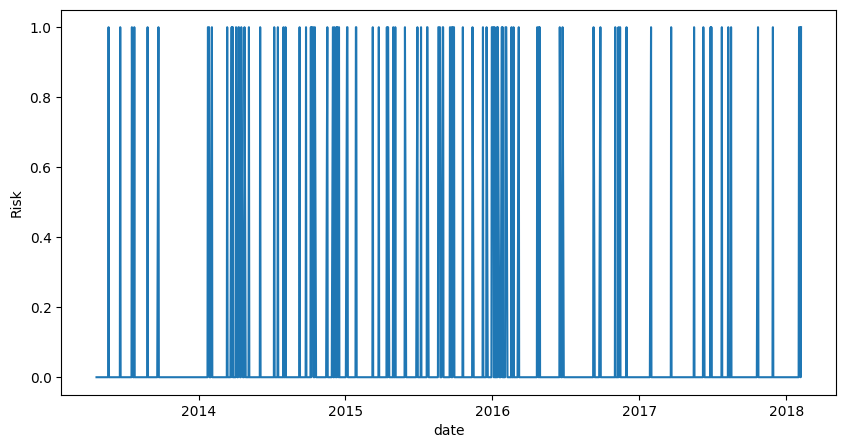

In [85]:
plt.figure(figsize = (10,5))
sns.lineplot(x = stock_data.index, y = stock_data.Risk)
plt.show()

We clearly observe that, investment in google was really risky during the year range of 2014-2016, with time, the risk lines got scarced.

Now that the Target Variable (Risk) is set, It's time to build the model to fit the data and obtain certain predictions from it.

In [76]:
from sklearn.model_selection import train_test_split

features = ['open' , 'high', 'low', 'close', 'volume', 'MA20', 'MA50', 'Volatility']
X = stock_data[features]
y = stock_data['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (847, 8)
Testing data shape: (363, 8)


Fitting the appropriate Logistic Regression Model that helps in understading the risk in investing in the stock.

In [79]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter= 1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Now that the model is trained, let us evaluate the model by evaluation metrics

In [86]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.92
